# Retro Inversian

FASTAを入力してペプチドのタイプを選択すると、L体とD体の構造を描画します。

1. FASTAを入力する
2. Linerは1、Head to Tailは2を選択する

[03:34:30] Molecule does not have explicit Hs. Consider calling AddHs()
[03:34:30] Molecule does not have explicit Hs. Consider calling AddHs()
[03:34:30] Molecule does not have explicit Hs. Consider calling AddHs()
[03:34:30] Molecule does not have explicit Hs. Consider calling AddHs()


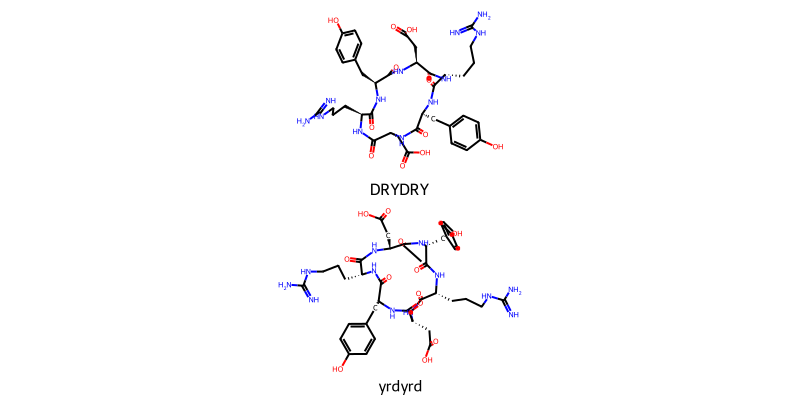

In [47]:
from rdkit import Chem
from rdkit.Chem import Draw, rdDepictor, AllChem
from rdkit.Chem.Draw import IPythonConsole
# 環状化合物をきれいに描画 https://future-chem.com/rdkit-coordgen/
rdDepictor.SetPreferCoordGen(True)

# aminoacid format
laa = 'N[C@@]([H])({X})C(=O)'
daa = 'N[C@@]({X})([H])C(=O)'

# residue dict
amino_acids = {
    'G': '[H]',
    'A': 'C',
    'V': 'C(C)C',
    'L': 'CC(C)C',
    'I': 'C(C)CC',
    'M': 'CCSC',
    'F': 'CC1=CC=CC=C1',
    'W': 'CC1=CNC2=C1C=CC=C2',
    'S': 'CO',
    'C': 'CS',
    'Y': 'CC1=CC=C(C=C1)O',
    'N': 'C(C(=O)N)',
    'Q': 'C(CC(=O)N)',
    'D': 'C(C(=O)O)',
    'E': 'C(CC(=O)O)',
    'H': 'C(C1=CNC=N1)',
    'K': 'CCCCN',
    'R': 'CCCNC(=N)N',
}

# insert variable to format
laaa = {k: laa.format(X=v) for k, v in amino_acids.items()}
daaa = {k: daa.format(X=v) for k, v in amino_acids.items()}

# add prolines and threonines
laaa['P'] = 'N1[C@@]([H])(CCC1)C(=O)'
daaa['P'] = 'N1[C@@](CCC1)([H])C(=O)'
laaa['T'] = 'N[C@@]([H])([C@]([H])(O)C)C(=O)'
daaa['T'] = 'N[C@@]([C@]([H])(O)C)([H])C(=O)'

# PepType
PepType = {
    '1' : 'Liner',
    '2' : 'Head to Tail',
    '3' : 'Disulfide'
}


FASTA = input('FASTA?')
fasta = FASTA[::-1]
type = input('choose PepType number')

# FASTA = 'CAWAFAAAC'
# fasta = FASTA[::-1]
# type = 'Disulfide'


l_sec = ''.join([laaa[aa] for aa in FASTA])
d_sec = ''.join([daaa[aa] for aa in fasta])

# liner
l_liner = l_sec + 'O'
d_liner = d_sec + 'O'

l_ht = 'N9' + l_sec[1:-4] + '9(=O)'
d_ht = 'N9' + d_sec[1:-4] + '9(=O)'



# Draw.MolToImage(Chem.MolFromSmiles(l_ht), size=(1000, 400))

if type == '2':
    l_smiles = l_ht
    d_smiles = d_ht
elif type == '3':
    l_smiles = l_ds
    d_smiles = d_ds
else:
    l_smiles = l_liner
    d_smiles = d_liner

# generate molecules
l_mol = Chem.MolFromSmiles(l_smiles)
d_mol = Chem.MolFromSmiles(d_smiles)

# generate 3D conformations
molecule = Chem.AddHs(l_mol)
AllChem.EmbedMolecule(l_mol)
AllChem.UFFOptimizeMolecule(l_mol)
molecule = Chem.AddHs(d_mol)
AllChem.EmbedMolecule(d_mol)
AllChem.UFFOptimizeMolecule(d_mol)
mols = [l_mol, d_mol]

# output
Draw.MolsToGridImage([l_mol, d_mol], molsPerRow=1, subImgSize=(800,200), legends=[FASTA, fasta.lower()])

# 分子を重ね合わせて表示する

In [48]:
import copy
from rdkit.Chem import AllChem, rdMolAlign, Draw, rdMolDescriptors


crippen_mols = [copy.deepcopy(m) for m in mols]
crippen_contribs = [rdMolDescriptors._CalcCrippenContribs(m) for m in crippen_mols]
crippen_o3as = [AllChem.GetCrippenO3A(prbMol=crippen_mols[i], refMol=crippen_mols[0],
                                     prbCrippenContribs=crippen_contribs[i],
                                     refCrippenContribs=crippen_contribs[0]) 
               for i in range(1, len(crippen_mols))]

view = py3Dmol.view(width=1000, height=400)
view.addModel(Chem.MolToMolBlock(crippen_mols[0]), 'sdf')
crippen_o3as[0].Align()
view.addModel(Chem.MolToMolBlock(crippen_mols[1]), 'sdf')
view.setStyle({'stick': {}})
view.zoomTo()
view.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

# SDFの保存

L体はFASTA, D体はatsafをファイル名としてsdfを保存します。

### L体とD体両方を合わせて保存

In [49]:
# SDFファイルに保存
writer = Chem.SDWriter(FASTA + '_dl.sdf')
writer.write(l_mol)
writer.write(d_mol)
writer.close()

### L体

In [40]:
# SDFファイルに保存
writer = Chem.SDWriter(FASTA + '.sdf')
writer.write(l_mol)
writer.close()


[03:28:04] Molecule does not have explicit Hs. Consider calling AddHs()
[03:28:04] Molecule does not have explicit Hs. Consider calling AddHs()


### D体

In [41]:
# SDFファイルに保存
writer = Chem.SDWriter(fasta.lower() + '.sdf')
writer.write(d_mol)
writer.close()

[03:28:08] Molecule does not have explicit Hs. Consider calling AddHs()
[03:28:09] Molecule does not have explicit Hs. Consider calling AddHs()
